In [22]:
from ast import increment_lineno
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
import numpy as np
import graphviz
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

In [23]:
# Loading dataset
!ls

heart_disease_dataset.csv  sample_data


In [24]:
hd_data = pd.read_csv('heart_disease_dataset.csv')
hd_data.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [25]:
hd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


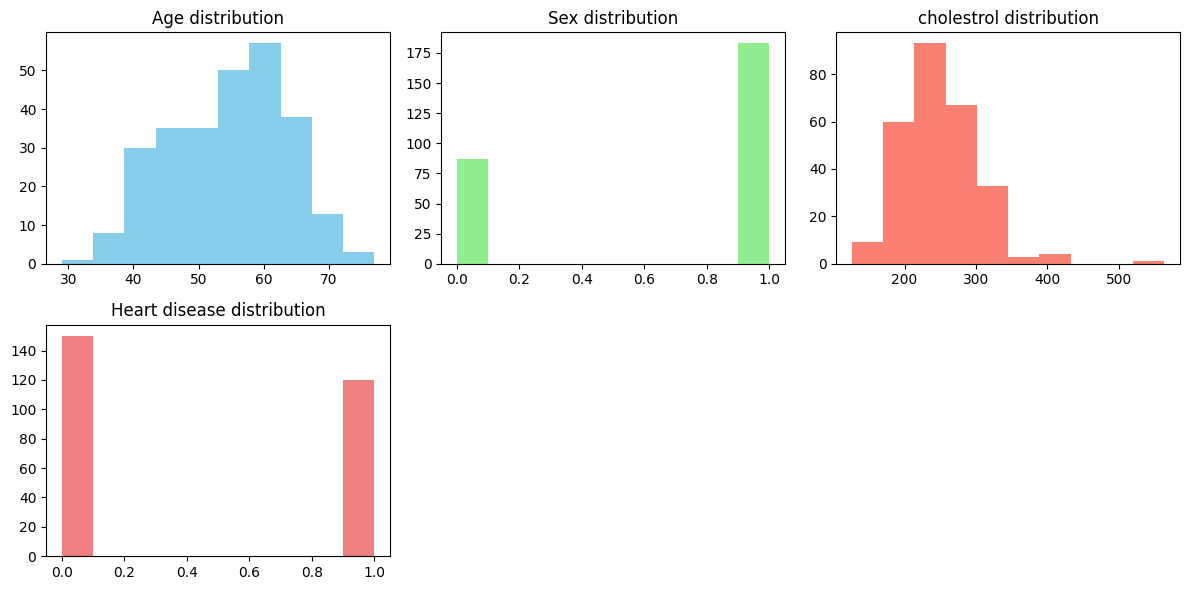

In [26]:
# visualizing the data distribution
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.hist(hd_data.age, bins = 10, color = 'skyblue')
plt.title('Age distribution')

plt.subplot(2, 3, 2)
plt.hist(hd_data.sex, bins = 10, color = 'lightgreen')
plt.title('Sex distribution')

plt.subplot(2, 3, 3)
plt.hist(hd_data.cholestrol, bins = 10, color = 'salmon')
plt.title('cholestrol distribution')

plt.subplot(2, 3, 4)
plt.hist(hd_data['heart disease'], bins = 10, color = 'lightcoral')
plt.title('Heart disease distribution')

plt.tight_layout()
plt.show()


In [27]:
# checking class imbalance
hd_data['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [28]:
hd_data.size

1350

In [29]:
hd_data.shape

(270, 5)

In [30]:
hd_data_feature = hd_data.drop('heart disease', axis = 1)
target = hd_data['heart disease']

In [31]:
hd_data_feature.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [32]:
target.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

In [33]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(hd_data_feature, target, test_size = 0.3, random_state = 50)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (189, 4)
X_test:  (81, 4)
y_train:  (189,)
y_test:  (81,)


In [34]:
help(tree.DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

### Using Grid Search CV and K fold cross velidation for hyperparameter tuning.

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [37]:
dt = tree.DecisionTreeClassifier(random_state = 100)

In [38]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 4, 5, 6, 9, 12],
    'min_samples_leaf' : [4, 5, 10, 15, 20, 30],
    'min_samples_split' : [4, 6, 10, 15, 25, 30]
}

In [39]:
grid_search_obj = GridSearchCV(
    estimator = dt,
    param_grid = params,
    cv = 4,
    n_jobs = -1,
    verbose = 1,
    scoring = "accuracy"
)

In [40]:
%%time
grid_search_obj.fit(X_train, y_train)

Fitting 4 folds for each of 432 candidates, totalling 1728 fits
CPU times: user 547 ms, sys: 50.3 ms, total: 598 ms
Wall time: 5.94 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 9, 12],
                         'min_samples_leaf': [4, 5, 10, 15, 20, 30],
                         'min_samples_split': [4, 6, 10, 15, 25, 30]},
             scoring='accuracy', verbose=1)

In [41]:
grid_search_df = pd.DataFrame(grid_search_obj.cv_results_)
grid_search_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004288,0.002109,0.001645,0.000228,gini,3,4,4,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.6875,0.531915,0.659574,0.723404,0.650598,0.072161,58
1,0.002526,0.000351,0.001973,0.000353,gini,3,4,6,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.6875,0.531915,0.659574,0.723404,0.650598,0.072161,58
2,0.002816,0.000435,0.001986,0.000388,gini,3,4,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.6875,0.531915,0.659574,0.723404,0.650598,0.072161,58
3,0.002796,0.000430,0.002021,0.000391,gini,3,4,15,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.6875,0.553191,0.659574,0.723404,0.655918,0.063478,35
4,0.002792,0.000435,0.001772,0.000043,gini,3,4,25,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.6875,0.553191,0.659574,0.723404,0.655918,0.063478,35


In [42]:
grid_search_df.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
324,0.002496,0.000071,0.001698,0.000037,entropy,6,4,4,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.729167,0.531915,0.702128,0.744681,0.676973,0.085122,1
325,0.002462,0.000039,0.001953,0.000454,entropy,6,4,6,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.729167,0.531915,0.702128,0.744681,0.676973,0.085122,1
326,0.002428,0.000034,0.001738,0.000011,entropy,6,4,10,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.729167,0.531915,0.702128,0.744681,0.676973,0.085122,1
144,0.003400,0.001271,0.001844,0.000096,gini,9,4,4,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.729167,0.510638,0.702128,0.744681,0.671653,0.094201,4
145,0.002561,0.000041,0.002179,0.000796,gini,9,4,6,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.729167,0.510638,0.702128,0.744681,0.671653,0.094201,4


In [43]:
grid_search_obj.best_score_

0.6769725177304964

In [44]:
grid_search_obj.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 4}

In [45]:
grid_search_obj.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=4,
                       min_samples_split=4, random_state=100)

In [54]:
# Creating a decision tree classifier using the above parameters
t_obj = tree.DecisionTreeClassifier(criterion='entropy',
                                    max_depth=6,
                                    min_samples_leaf=4,
                                    min_samples_split=4,
                                    random_state=100
                                    )

In [55]:
# fiting the model
t_model = t_obj.fit(X_train, y_train)
print(t_model)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=4,
                       min_samples_split=4, random_state=100)


In [56]:
# test predection
test_pred = t_model.predict(X_test)
test_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0])

In [57]:
y_test = np.array(y_test)
y_test

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

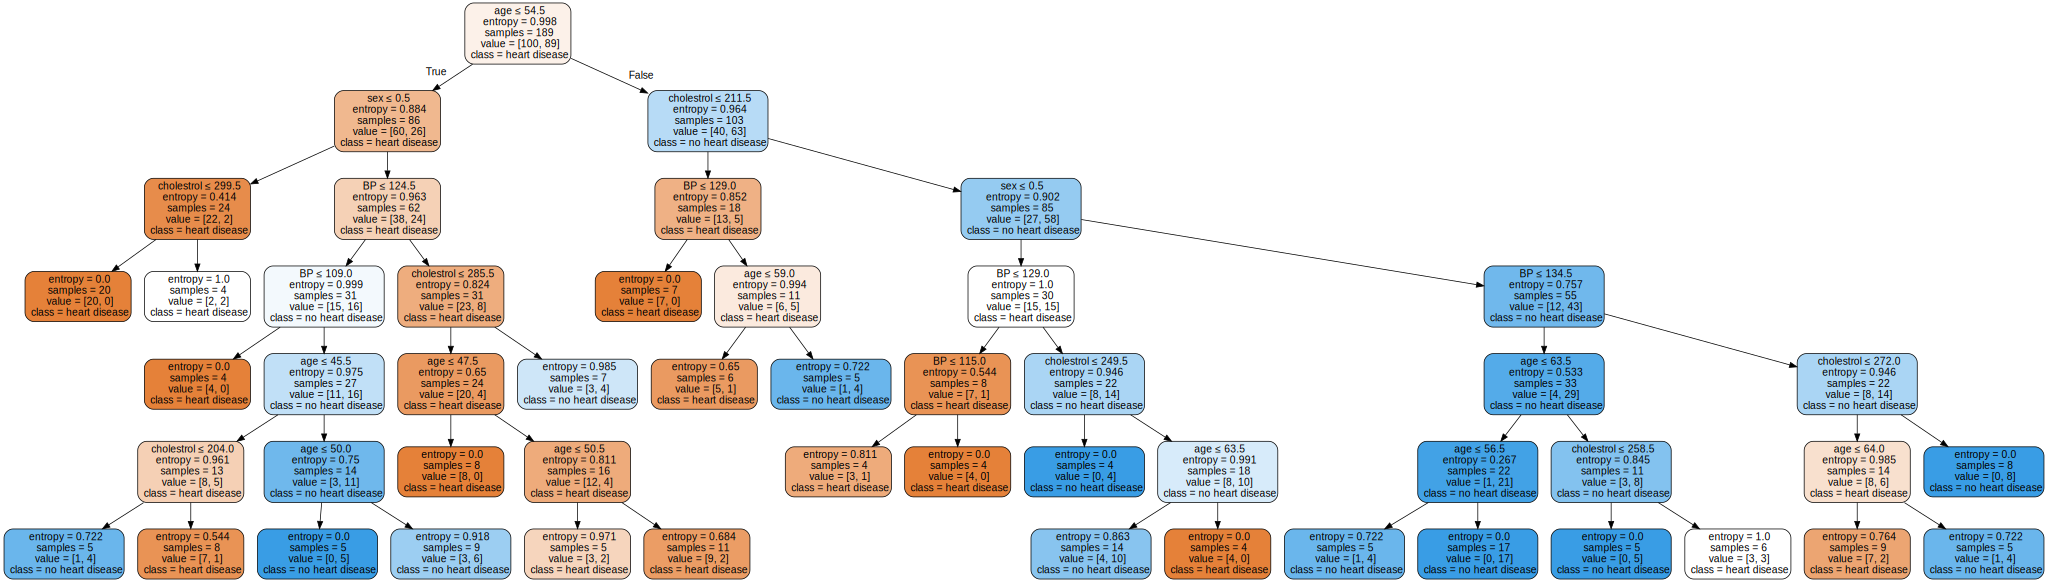

In [58]:
# Graphical representation of the decision tree model
my_data = tree.export_graphviz(t_obj, out_file=None,
                               feature_names=hd_data_feature.columns,
                               class_names = ['heart disease', 'no heart disease'],
                               filled = True,
                               rounded = True,
                               special_characters = True)
graph = graphviz.Source(my_data)
graph

In [59]:
# Evaluating model performance
train_pred = t_model.predict(X_train)
test_pred = t_model.predict(X_test)

In [60]:
# checking training accuracy
print(accuracy_score(y_train, train_pred))
confusion_matrix(y_train, train_pred)

0.8518518518518519


array([[86, 14],
       [14, 75]])

In [61]:
# checking test accuracy
print(accuracy_score(y_test, test_pred))
confusion_matrix(y_test, test_pred)

0.6419753086419753


array([[35, 15],
       [14, 17]])